In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

dataset= pd.read_csv("diabetes_dataset.csv")

In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
X= dataset.drop("Outcome", axis=1)
y= dataset[["Outcome"]]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=7)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score= model.score (X_test, y_test)
model_score

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7489177489177489

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_predict)
print(cnf_matrix)

[[127  20]
 [ 38  46]]


Text(0.5, 427.9555555555555, 'Predicted label')

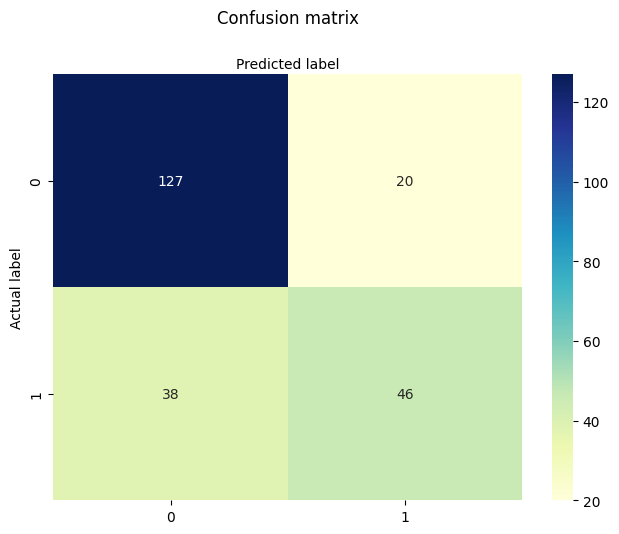

In [ ]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
true_neg, false_pos, false_neg, true_pos = cnf_matrix.ravel()
true_neg, false_pos, false_neg, true_pos
total = true_neg + false_pos + false_neg + true_pos

In [ ]:
accuracy = (true_pos + true_neg)/total
print(accuracy)

0.7489177489177489


In [ ]:
precision = true_pos/(true_pos + false_pos)
print(precision)

0.696969696969697


In [ ]:
recall = true_pos/(true_pos + false_neg)
print(recall)

0.5476190476190477


In [ ]:
f1_score = (2*precision*recall)/(precision+recall)
print(f1_score)

0.6133333333333334
